# Nhu Vo <space><space>
## ML GR5073 HW 1 part A: Regression on California test scores

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


# **Question 1: Find the url for the California Test Score Data Set from the following website**

In [ ]:
# Read csv file
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

# **Question 3: Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.**

In [ ]:
print(df.head())

   rownames  distcod   county                         district grspan  \
0         1    75119  Alameda               Sunol Glen Unified  KK-08   
1         2    61499    Butte             Manzanita Elementary  KK-08   
2         3    61549    Butte      Thermalito Union Elementary  KK-08   
3         4    61457    Butte  Golden Feather Union Elementary  KK-08   
4         5    61523    Butte         Palermo Union Elementary  KK-08   

   enrltot   teachers    calwpct    mealpct  computer     testscr   compstu  \
0      195  10.900000   0.510200   2.040800        67  690.799988  0.343590   
1      240  11.150000  15.416700  47.916698       101  661.200012  0.420833   
2     1550  82.900002  55.032299  76.322601       169  643.599976  0.109032   
3      243  14.000000  36.475399  77.049202        85  647.700012  0.349794   
4     1335  71.500000  33.108601  78.427002       171  640.849976  0.128090   

       expnstu        str     avginc      elpct     readscr     mathscr  
0  6384.9111

our target feature/dependent variable is test score "testscr"

three independent (explanatory) variables that I hypothesize might influence the dependent variable:
1. "compstu": computer per student
2. "str": student teacher ratio
3. "avginc": district average income



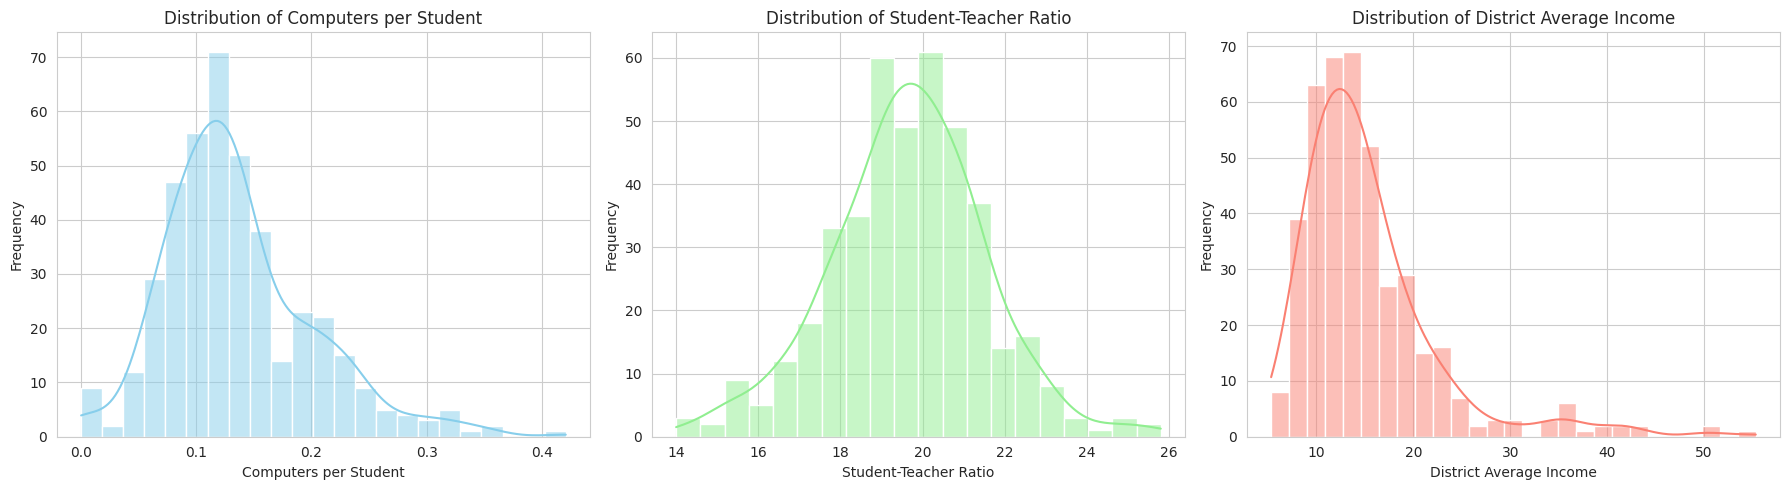

In [ ]:
# Aesthetic style of the plots
sns.set_style("whitegrid")

# Creating histograms/density plots for each feature
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot for "compstu": computer per student
sns.histplot(df['compstu'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Computers per Student')
axes[0].set_xlabel('Computers per Student')
axes[0].set_ylabel('Frequency')

# Plot for "str": student teacher ratio
sns.histplot(df['str'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Student-Teacher Ratio')
axes[1].set_xlabel('Student-Teacher Ratio')
axes[1].set_ylabel('Frequency')

# Plot for "avginc": district average income
sns.histplot(df['avginc'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Distribution of District Average Income')
axes[2].set_xlabel('District Average Income')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Question 4: Visualize the dependency of the target on each feature you just plotted.**

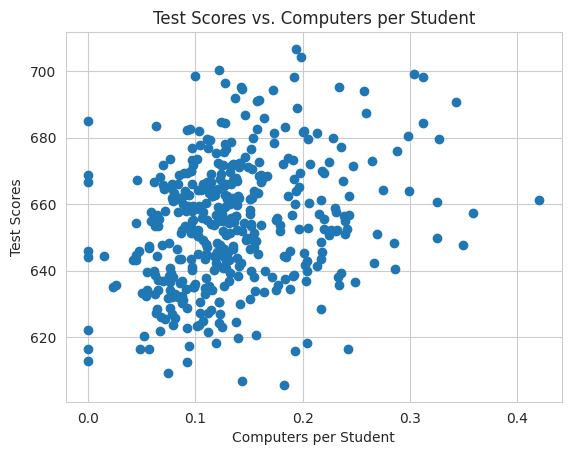

In [ ]:
plt.scatter(df['compstu'], df['testscr'])
plt.xlabel('Computers per Student')  # Label for the x-axis
plt.ylabel('Test Scores')  # Label for the y-axis
plt.title('Test Scores vs. Computers per Student')  # Title for the plot
plt.show()

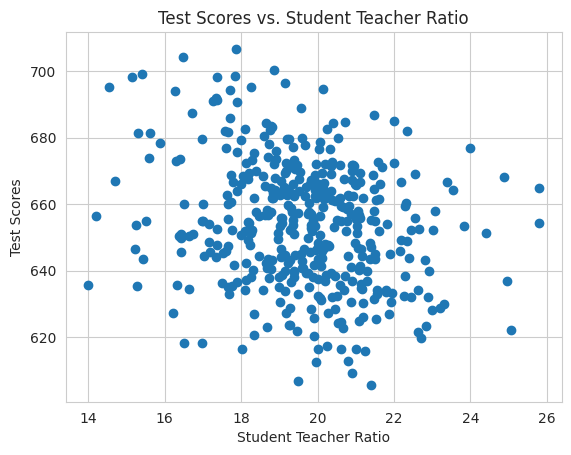

In [ ]:
plt.scatter(df['str'], df['testscr'])
plt.xlabel('Student Teacher Ratio')  # Label for the x-axis
plt.ylabel('Test Scores')  # Label for the y-axis
plt.title('Test Scores vs. Student Teacher Ratio')  # Title for the plot
plt.show()

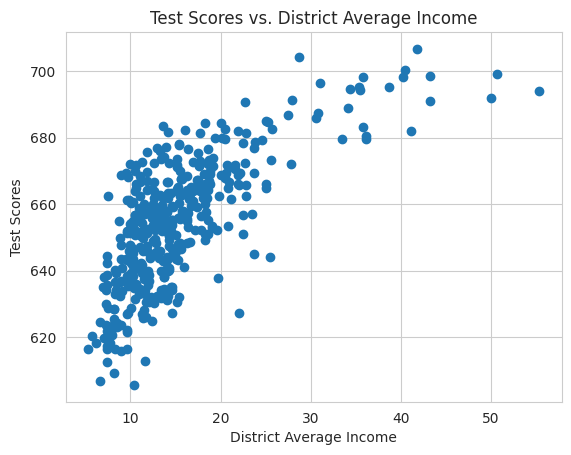

In [ ]:
plt.scatter(df['avginc'], df['testscr'])
plt.xlabel('District Average Income')  # Label for the x-axis
plt.ylabel('Test Scores')  # Label for the y-axis
plt.title('Test Scores vs. District Average Income')  # Title for the plot
plt.show()

# **Question 5:**


## Splitting into train-test

In [ ]:
# Delete extra variable that is not continuous + mathscr + readscr

data = df.drop(['county', 'district', 'grspan','rownames','distcod','readscr','mathscr'], axis=1, errors='ignore')

# Display the first few rows to verify the changes
data.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [ ]:
### Change variable names to X, y to create train/test split
y = data['testscr']
X = data.loc[:, data.columns != 'testscr']

print(y[0:5])
X.head()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [ ]:
# Train test split
# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75)

print(X.shape)
X_train.shape

(420, 10)


(315, 10)


## **Running Regressions**

*Notes on KNN*

KNeighborsClassifier is intended for classification tasks, not regression.

My target variable, ie. test score is continuous, indicates that I should be performing a regression task

*   'testscr' (test scores) is considered continuous
because it can take on any value within a range, potentially including decimals, to represent the score accurately.

*   categorical variables, which represent discrete groups or categories, such as 'district' or 'county' names in your dataset.


### **KNN**
##### Evaluate KNN for regression using cross-validation with the default parameters


*   Evaluating KNN for regression" means assessing how well my K-Nearest Neighbors Regression model performs in predicting continuous outcomes based on the input features.

*  Involves using metrics like R^2 score and RMSE to assess how well the KNN regression model predicts continuous outcomes.


*   the evaluation involves certain metrics that quantify the accuracy of the predictions compared to the actual values (y^ and y target )


*   2 metrics for this purpose: R^2 score and RMSE


*   R-squared is a statistical measure that represents the goodness of fit of a regression model. The value of R-square lies between 0 to 1. Where we get R-square equals 1 when the model perfectly fits the data and there is no difference between the predicted value and actual value
*   RMSE shows how far predictions fall from measured true values using Euclidean distance.







In [ ]:
# cross validation
cv_scores = cross_val_score(KNeighborsRegressor(n_neighbors=15), X_train, y_train, cv=5, scoring="r2")
print("Cross-validation mean R^2 score: {:.3f}".format(np.mean(cv_scores)))

Cross-validation mean R^2 score: 0.021


In [ ]:
# Training set and test set performance using R^2
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))

Test set score: 0.01



### **Linear Regression (OLS).**

##### Evaluate Linear Regression using cross-validation with the default parameters

In [ ]:
# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

coefs_ols = lr.coef_

In [ ]:
# Training set and test set performance using R^2
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# Cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring="r2")
print("Cross-validation mean R^2 score: {:.3f}".format(np.mean(cv_scores)))

Training set score: 0.81
Test set score: 0.80
Cross-validation mean R^2 score: 0.780



### **Ridge Regression**
##### Evaluate Ridge Regression using cross-validation with the default parameters

In [ ]:
# Initialize and fit the Ridge regression model
ridge = Ridge().fit(X_train, y_train)

# Evaluate the model
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.799


In [ ]:
# Cross-validation
cv_scores = cross_val_score(Ridge(), X_train, y_train, cv=10, scoring="r2")
print("Cross-validation mean R^2 score: {:.3f}".format(np.mean(cv_scores)))

Cross-validation mean R^2 score: 0.781



### **Lasso Regression**
##### Evaluate Lasso Regression using cross-validation with the default parameters

In [ ]:
lasso = Lasso(alpha=0.01,max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.81
Test set score: 0.80
Number of features used: 10


In [ ]:
# Cross-validation
cv_scores = cross_val_score(Lasso(alpha=0.01,max_iter=100000), X_train, y_train, cv=10, scoring="r2")
print("Cross-validation mean R^2 score: {:.3f}".format(np.mean(cv_scores)))

Cross-validation mean R^2 score: 0.780



## **Scaling Data with Standard Scaler**

In [ ]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [ ]:
#Train test split

y_scaled = data_scaled['testscr']
X_scaled = data_scaled.loc[:, data_scaled.columns != 'testscr']

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled,y_scaled,random_state=0)

### **StandardScaler on OLS**

In [ ]:
# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

coefs_ols = lr.coef_

# Training set and test set performance using R^2
print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test_scaled)))

# Cross-validation
cv_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train_scaled, cv=10, scoring="r2")
print("Cross-validation mean R^2 score: {:.3f}".format(np.mean(cv_scores)))

Training set score: 0.81
Test set score: 0.80
Cross-validation mean R^2 score: 0.780



### **StandardScaler on KNN Model**

In [ ]:
# cross validation
cv_scores = cross_val_score(KNeighborsRegressor(n_neighbors=15), X_train_scaled, y_train_scaled, cv=5, scoring="r2")
print("Cross-validation mean R^2 score: {:.3f}".format(np.mean(cv_scores)))
knn = KNeighborsRegressor(n_neighbors=15).fit(X_train_scaled,y_train_scaled)
print("Test set score: {:.2f}".format(knn.score(X_test_scaled,y_test_scaled)))



Cross-validation mean R^2 score: 0.748
Test set score: 0.70



### **StandardScaler on Ridge Regression Model**

In [ ]:
# Initialize and fit the Ridge regression model
ridge = Ridge().fit(X_train_scaled, y_train_scaled)

# Evaluate the model
print("Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.3f}".format(ridge.score(X_test_scaled, y_test_scaled)))
# Cross-validation
cv_scores = cross_val_score(Ridge(), X_train_scaled, y_train_scaled, cv=10, scoring="r2")
print("Cross-validation mean R^2 score: {:.3f}".format(np.mean(cv_scores)))


Training set score: 0.81
Test set score: 0.799
Cross-validation mean R^2 score: 0.781



### **StandardScaler on Lasso Regression Model**

In [ ]:
# Initialize and fit the Ridge regression model
lasso = Lasso(alpha=0.01).fit(X_train_scaled, y_train_scaled)

# Evaluate the model
print("Test set score: {:.3f}".format(lasso.score(X_test_scaled, y_test_scaled)))
# Cross-validation
cv_scores = cross_val_score(Lasso(alpha=0.01), X_train_scaled, y_train_scaled, cv=10, scoring="r2")
print("Cross-validation mean R^2 score: {:.3f}".format(np.mean(cv_scores)))

Test set score: 0.800
Cross-validation mean R^2 score: 0.782



### **Does scaling the data with the StandardScaler help?**
- Linear regression is scaling invariant.

- Scaling is important for ridge and lasso because scale is important when constraining the coefficients. Here the results did not change
- Results inmproved for KNN because it is sensitive to scaling because it is distance-based

# **Question 6: Tune the parameters of the models where possible using GridSearchCV.**

GridSearchCV automates the process of finding optimal hyperparameter values, such as the best 'alpha' for Ridge and Lasso regression or 'n_neighbors' for KNN, eliminating the need for manual experimentation across models with hyperparameters.


## **Ridge**

In [ ]:
# Define the parameter grid for Ridge regression
param_grid = {'alpha': np.logspace(-4, 2, 20)}  # Exploring 20 values from 10^-4 to 10^2
# creating a list of values from 10^-4 to 1

# Initialize GridSearchCV with the Ridge model and the parameter grid
grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=10, scoring='r2')
# higher r^2 = better

# Fit the model
grid.fit(X_train_scaled, y_train_scaled)
best_ridge = grid.best_estimator_

# Print the results
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))

Best mean cross-validation score: 0.782
Best parameters: {'alpha': 11.288378916846883}
Test-set score: 0.793



## **Lasso**



In [ ]:
# Define the parameter grid for Lasso regression
param_grid = {'alpha': np.logspace(-4, 2, 20)}  # Exploring 20 values from 10^-4 to 10^2
# creating a list of values from 10^-4 to 1

# Initialize GridSearchCV with the Lasso model and the parameter grid
grid = GridSearchCV(Lasso(max_iter=100000), param_grid=param_grid, cv=10, scoring='r2')
# higher r^2 = better

# Fit the model
grid.fit(X_train_scaled, y_train_scaled)
best_lasso = grid.best_estimator_

# Print the results
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))

Best mean cross-validation score: 0.782
Best parameters: {'alpha': 0.007847599703514606}
Test-set score: 0.800



## **KNN**

In [ ]:
# Define the parameter grid for KNN regression
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,15,20,30,50]}  # Exploring 20 values from 10^-4 to 10^0
# creating a list of values from 10^-4 to 1

# Initialize GridSearchCV with the Ridge model and the parameter grid
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10, scoring='r2')
# higher r^2 = better

# Fit the model
grid.fit(X_train_scaled, y_train_scaled)

# Print the results
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))
print("Test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))

Best mean cross-validation score: 0.739
Best parameters: {'n_neighbors': 8}
Test-set score: 0.706


# **Question 6: Tune the parameters of the models where possible using GridSearchCV.**
## **Do the results improve?**

After tuning the parameters of the models using gridsearch

The results did not improve significantly


# **Question 7: Compare the coefficients of your two best linear models (not KNN). Do they agree on which features are important?**




In [ ]:
# Look at coefficients directly to see if models agree on which features are important

# Compare coefficients
ridge_coefs = best_ridge.coef_
lasso_coefs = best_lasso.coef_

# Assuming you have a DataFrame or similar structure for the feature names
feature_names = X_train.columns



print("Feature\t\tRidge Coefficient\tLasso Coefficient")
for feature, ridge_coef, lasso_coef in zip(feature_names, ridge_coefs, lasso_coefs):
    print(f"{feature}\t{ridge_coef:.3f}\t\t{lasso_coef:.3f}")


Feature		Ridge Coefficient	Lasso Coefficient
enrltot	-0.038		-0.017
teachers	-0.021		-0.000
calwpct	-0.101		-0.072
mealpct	-0.425		-0.477
computer	0.042		0.000
compstu	0.035		0.038
expnstu	0.064		0.061
str	-0.021		-0.015
avginc	0.238		0.229
elpct	-0.207		-0.190


**positive/negative coefficients**
*   features such as mealpct, compstu, str, avginc, and elpct have significant coefficients (both positive and negative), indicating these features weigh more in the model's prediction
*   both models agree on the positive and negative direction and the  magnitude of these coefficients

**conclusion**
*   Ridge and Lasso models agree on the importance of most features and their corresndponding coefficients

<Axes: >

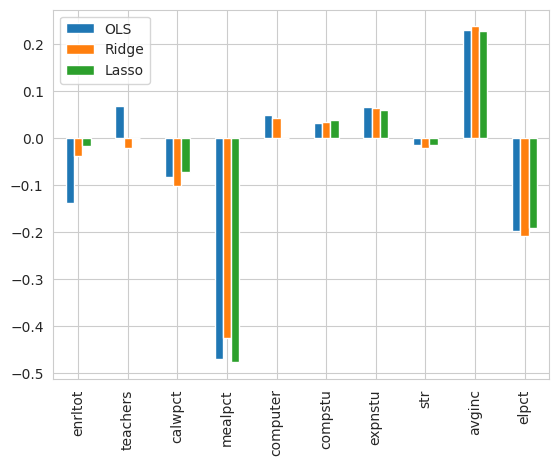

In [ ]:
# Coefficients comparison
coefs_df = pd.DataFrame(columns=feature_names)
coefs_df.loc['OLS'] = coefs_ols
coefs_df.loc['Ridge'] = ridge_coefs
coefs_df.loc['Lasso'] = lasso_coefs
coefs_df.T.plot(kind='bar')


- All models seem to both agree that mealpct, avginc and elpct are the most important.
- One noticeable difference is the teachers variable than gets zeroed out by LASSO (aka this feature doesn't matter when performing LASSO), enrolltot is also very different when we use penalized models



# **Question 8: Discuss which final model you would choose to predict new data.**

I think all linear models are pretty similar, especially their cv score, test-set score, and the features' coefficients that they agree on. Either model works, just not KNN

# PART B

In [ ]:
# Read csv file for white wine
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv")
print(white_wine.head())

In [ ]:
# Read csv file for red wine
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
print(red_wine.head())

# Nhu Vo <space><space>
## ML GR5073 HW 1 part A: Classification on red and white wine characteristics

In [ ]:
# Import Panda Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold
import statsmodels.api as sm

from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


# **Question 1: Import red and white wine cvs files**

In [ ]:
# Read csv file for white wine
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv")
print(white_wine.head())


  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                  

In [ ]:
# Read csv file for red wine
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
print(red_wine.head())


  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                  

# **Question 2: Add a new column to each data frame called "winetype". For the white wine dataset label the values in this column with a 0, indicating white wine. For the red wine dataset, label values with a 1, indicating red wine. Combine both datasets into a single dataframe. The target data (i.e. the dependent variable) is "winetype".**

In [ ]:
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Load the datasets with semicolon delimiter
# The dataset I'm working with uses semicolons to separate values within each row
# Semicolon delimiter ';' separate individual data items within a row
white_wine = pd.read_csv(white_wine_url, sep=';')
red_wine = pd.read_csv(red_wine_url, sep=';')

# Add a 'winetype' column to differentiate between white (0) and red (1) wines
white_wine['winetype'] = 0
red_wine['winetype'] = 1

# Combine the datasets
wines = pd.concat([white_wine, red_wine], ignore_index=True)


In [ ]:
print(wines)
print(wines.columns)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# **Question 3: Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.**

our target feature/dependent variable is wine type "winetype"

three independent (explanatory) variables that I hypothesize might influence the dependent variable:
1. alcohol
2. pH
3. density

In [ ]:
print(wines.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'winetype'],
      dtype='object')


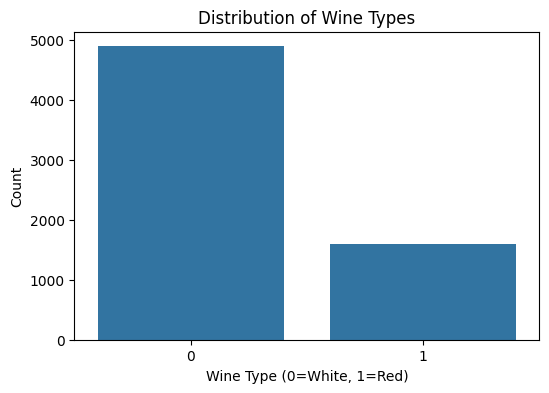

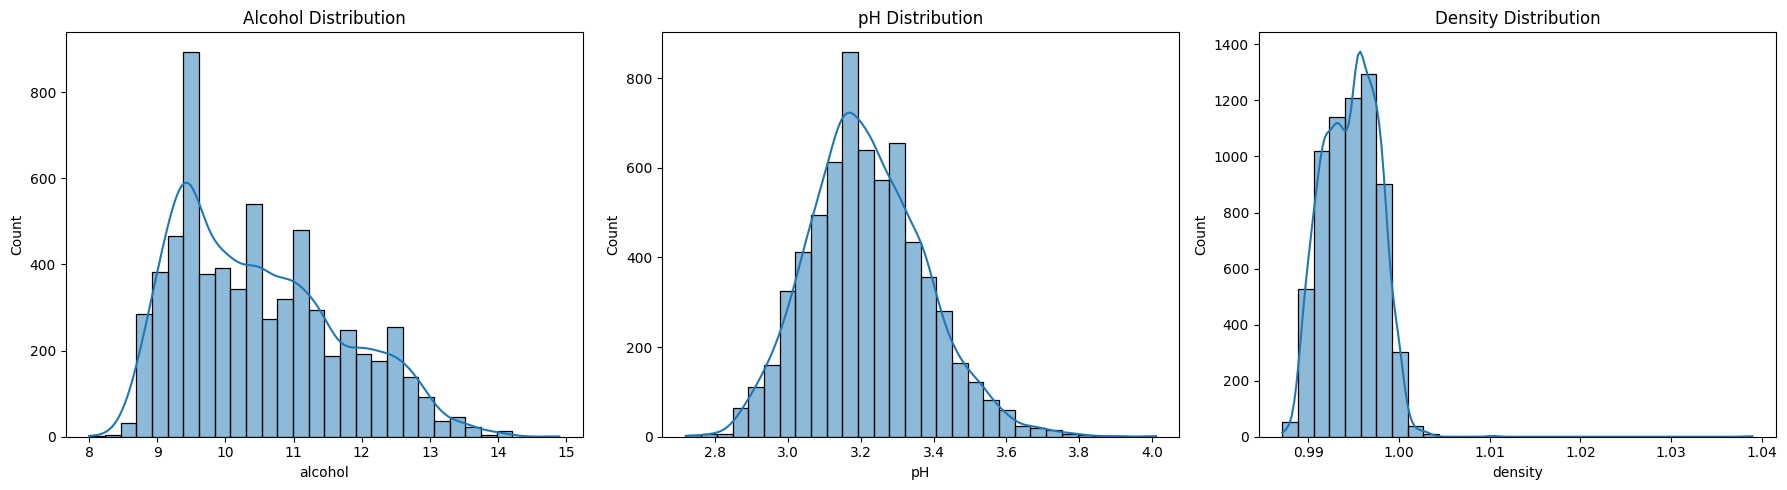

In [ ]:
%matplotlib inline

# Visualize the univariate distribution of 'winetype'
plt.figure(figsize=(6, 4))
sns.countplot(x='winetype', data=wines)
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type (0=White, 1=Red)')
plt.ylabel('Count')
plt.show()

# Visualize the univariate distributions of 'alcohol', 'pH', and 'density'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(wines['alcohol'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Alcohol Distribution')

sns.histplot(wines['pH'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('pH Distribution')

sns.histplot(wines['density'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Density Distribution')

plt.tight_layout()
plt.show()


# **Question 4:**


## **Split data into training and test sets.**

In [ ]:
# Change variable names to X, y to create train/test split
y = wines['winetype']
# extract target variable from "wines" datagrame and assigns it to "y"

X = wines.loc[:, wines.columns != 'winetype']
# selects all columns from "wines" except winetype and assigns resulting dataframe to "x"

# printing the first 5 rows of 'y' and the head of 'X'
print(y[0:5])
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: winetype, dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  


In [ ]:
# Train Test Split
# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

print(X.shape)
X_train.shape

(6497, 12)


(4872, 12)

L1 or Lasso
*   type of regularization penalty applied to model to prevent overfitting by penalizing large coefficients
*   adds penalty that is sum of absolute values of Beta

*   List item


L2 or Ridge
*   type of regularization penalty applied to model to prevent overfitting by penalizing large coefficients
*   adds penalty that is suare root of sum of squares

C Parameter
*    hyperparameter that controls the strength of the L1 or L2 penalty
*   small c = stronger penalty (more regularization)
*   big c = weaker penalty (less regularization)
*  Lower values of C correspond to stronger regularization. This means the model is encouraged to find simpler, less complex functions that may generalize better to unseen data, at the cost of potentially higher bias on the training set.
*   Higher values of C suggest weaker regularization, allowing the model to focus more on fitting the training data as closely as possible, at the risk of overfitting.



## Run classifiers


### **Logistic Regression**

In [ ]:
# Set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
logreg = LogisticRegression(penalty='none',max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


# Perform cross-validation and print mean accuracy
scores = cross_val_score(logreg, X, y, cv=5)  # cv=5 for 5-fold cross-validation
print("Mean cross-validation accuracy: {:.3f}".format(scores.mean()))

Training set score: 0.994
Test set score: 0.994
Mean cross-validation accuracy: 0.988


### **L2 Logistic Regression**


In [ ]:
# C=100, compare coefs to regular model above.
logreg = LogisticRegression(C=100, penalty='l2',solver='saga',max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

# Initialize the Logistic Regression model with L2 penalty
logreg = LogisticRegression(C=100, penalty='l2', max_iter=10000,solver='saga')
# Perform cross-validation and calculate the mean accuracy
scores = cross_val_score(logreg, X, y, cv=5)  # Using 5-fold cross-validation
# Print the mean accuracy from cross-validation
print("Mean cross-validation accuracy: {:.3f}".format(scores.mean()))


Training set score: 0.965
Test set score: 0.964
Mean cross-validation accuracy: 0.965


### **L1 Logistic regression**

In [ ]:
# C=100, compare coefs to regular model above.
logreg = LogisticRegression(C=100, penalty='l1',solver='saga',max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

# Initialize the Logistic Regression model with L2 penalty
logreg = LogisticRegression(C=100, penalty='l1', max_iter=10000,solver='saga')
# Perform cross-validation and calculate the mean accuracy
scores = cross_val_score(logreg, X, y, cv=5)  # Using 5-fold cross-validation
# Print the mean accuracy from cross-validation
print("Mean cross-validation accuracy: {:.3f}".format(scores.mean()))


Training set score: 0.965
Test set score: 0.964
Mean cross-validation accuracy: 0.965


### **KNN**


In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Perform cross-validation
# cv specifies the number of folds; 5 is a common choice
scores = cross_val_score(knn, X, y, cv=5)
# Print the mean accuracy across all folds
print("Mean cross-validation accuracy: {:.2f}".format(scores.mean()))
knn.fit(X_train,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))


Mean cross-validation accuracy: 0.94
Test set score: 0.936



## **How different are the results?**


Except for KNN, the results for evaluating Logistic and Penalized Logistic Model using cross validation is not that different. Logistic regression models are slightly better when looking at accuracy



## **How does scaling the data with StandardScaler influence the results?**


In [ ]:
# Select only the float variables
float_cols = wines.select_dtypes(include=['float']).columns

# Create a copy of the DataFrame to store the scaled values
wines_scaled = wines.copy()

# Scale the float variables
scaler = StandardScaler()
wines_scaled[float_cols] = scaler.fit_transform(wines[float_cols])

# Change variable names to X, y to create train/test split
y_scaled = wines_scaled['winetype']
# extract target variable from "wines" datagrame and assigns it to "y"

X_scaled = wines_scaled.loc[:, wines_scaled.columns != 'winetype']

# Assuming X and y are your features and target variable
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, random_state=42)



### **Standard Scaler on KNN model**


In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
# Perform cross-validation
# cv specifies the number of folds; 5 is a common choice
scores = cross_val_score(knn, X_scaled, y_scaled, cv=5)
# Print the mean accuracy across all folds
print("Mean cross-validation accuracy: {:.2f}".format(scores.mean()))
knn.fit(X_train,y_train)
print("Test set score: {:.3f}".format(knn.score(X_test_scaled, y_test_scaled)))


Mean cross-validation accuracy: 0.99
Test set score: 0.991



### **Standard Scaler on Logistic Regression model**


In [ ]:
# Set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
logreg = LogisticRegression(penalty='none',max_iter=10000).fit(X_train_scaled, y_train_scaled)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_scaled)))
coefs = logreg.coef_


# Perform cross-validation and print mean accuracy
scores = cross_val_score(logreg, X_scaled, y_scaled, cv=5)  # cv=5 for 5-fold cross-validation
print("Mean cross-validation accuracy: {:.3f}".format(scores.mean()))


Training set score: 0.994
Test set score: 0.993
Mean cross-validation accuracy: 0.993



### **Standard Scaler on Penalized (L2) Logistic Regression model**


In [ ]:
# Set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
logreg = LogisticRegression(penalty='l2',max_iter=10000,solver='saga').fit(X_train_scaled, y_train_scaled)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_scaled)))


# Perform cross-validation and print mean accuracy
scores = cross_val_score(logreg, X_scaled, y_scaled, cv=5)  # cv=5 for 5-fold cross-validation
print("Mean cross-validation accuracy: {:.3f}".format(scores.mean()))

Training set score: 0.994
Test set score: 0.991
Mean cross-validation accuracy: 0.993



### **Standard Scaler on Penalized (L1) Logistic Regression model**

In [ ]:
# Set penalty to none since we are starting with non penalized logit, L1 and L2 are other options
logreg = LogisticRegression(penalty='l1',max_iter=10000,solver='saga').fit(X_train_scaled, y_train_scaled)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train_scaled)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test_scaled)))


# Perform cross-validation and print mean accuracy
scores = cross_val_score(logreg, X_scaled, y_scaled, cv=5)  # cv=5 for 5-fold cross-validation
print("Mean cross-validation accuracy: {:.3f}".format(scores.mean()))

Training set score: 0.994
Test set score: 0.993
Mean cross-validation accuracy: 0.993


### **How does scaling the data with StandardScaler influence the results?**



Scaling data improves the results across all the 3 models, and especially KNN because it is very sensitive to scaling



# **Question 5: Tune the parameters where possible using GridSearchCV**

## **KNN**

In [ ]:
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,15,20,30]} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

#use model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train_scaled)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))

best mean cross-validation score: 0.995
best parameters: {'n_neighbors': 2}
test-set score: 0.991



## **L1 Logistic Regression**

In [ ]:
# Define the parameter grid. Here, we are tuning 'C' (regularization strength) and 'penalty' (type of regularization)
param_grid = {
    'C': np.logspace(-3, 3, 20),  # Creates 20 values between 10^-4 and 10^4
}

# Initialize GridSearchCV with the pipeline and parameter grid, using 10-fold cross-validation
grid = GridSearchCV(LogisticRegression(penalty='l1',solver='saga',max_iter=10000), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid.fit(X_train_scaled, y_train_scaled)
best_l1 = grid.best_estimator_

# Extract and print the best parameters and the best cross-validation score
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

# Evaluate and print the score of the best model on the test set
print("Test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))

Best mean cross-validation score: 0.994
Best parameters: {'C': 1.438449888287663}
Test-set score: 0.993



## **L2 Logistic Regression**

In [ ]:
# Define the parameter grid. Here, we are tuning 'C' (regularization strength) and 'penalty' (type of regularization)
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Creates 20 values between 10^-4 and 10^4
}

# Initialize GridSearchCV with the pipeline and parameter grid, using 10-fold cross-validation
grid = GridSearchCV(LogisticRegression(penalty='l2',solver='saga',max_iter=10000), param_grid=param_grid, cv=10, scoring='accuracy')

# Fit GridSearchCV to the training data
grid.fit(X_train_scaled, y_train_scaled)
best_l2 = grid.best_estimator_

# Extract and print the best parameters and the best cross-validation score
print("Best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

# Evaluate and print the score of the best model on the test set
print("Test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test_scaled)))

Best mean cross-validation score: 0.994
Best parameters: {'C': 4.281332398719396}
Test-set score: 0.993


# **Question 6: Compare the coefficients for Logistic Regression and Penalized Logistic Regression. Do they agree on which features are important?**





<Axes: >

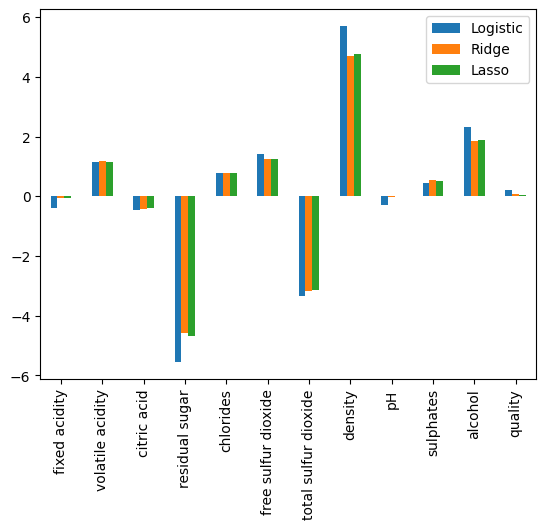

In [ ]:
# Coefficients comparison
features = X_train.columns

coefs_df = pd.DataFrame(index=features)
coefs_df['Logistic'] = coefs.reshape(-1,)
coefs_df['Ridge'] = best_l2.coef_.reshape(-1,)
coefs_df['Lasso'] = best_l1.coef_.reshape(-1,)
coefs_df.plot(kind='bar')

- All three logistic models agree on feature importance essentially
- The most important features are density, residual sugar and total sulfur dioxide


# **Question 7: Discuss which final model you would choose to predict new data.**


Based on both test accurayc and corss-val accuracy, all logistic regression models are performing equally well. KNN is slightly below, but givne its non-parametric specification, I would recommend KNN

